In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
marketing_data_df = pd.read_csv('C:\SHOEB\Data analysis practice\Datasets\Marketing data\marketing_data.csv')

C:\Users\Shoeb

<H1>Used the below code to check the basic information of the data. </H1>

In [5]:
marketing_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Last_purchase        2240 non-null   object
 8   MntWines             2240 non-null   int64 
 9   MntFruits            2240 non-null   int64 
 10  MntMeatProducts      2240 non-null   int64 
 11  MntFishProducts      2240 non-null   int64 
 12  MntSweetProducts     2240 non-null   int64 
 13  MntGoldProds         2240 non-null   int64 
 14  NumDealsPurchases    2240 non-null   int64 
 15  NumWebPurchases      2240 non-null   int64 
 16  NumCat

<H1><U>Utilized for eliminating unnecessary columns.</U><H1>

In [4]:
marketing_data_df.drop(columns=['AcceptedCmp3', 'Recency', 'AcceptedCmp4', 'AcceptedCmp1', 'AcceptedCmp5', 'AcceptedCmp2'], inplace=True)


<H1>Determining the average number of items sold to pinpoint the top-selling product.</H1>

In [6]:
Finding_highest_purchase_df = marketing_data_df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                                              'MntSweetProducts', 'MntGoldProds']].describe().loc['mean']

Finding_highest_purchase_df.sort_values(ascending=False)

MntWines            303.935714
MntMeatProducts     166.950000
MntGoldProds         44.021875
MntFishProducts      37.525446
MntSweetProducts     27.062946
MntFruits            26.302232
Name: mean, dtype: float64

<H3>
    1) The top-selling item is MntWines (Wines product). To boost profit, we can focus on MntWines (Wines product) and MntMeatProducts (Meat product), which is the second best-seller.<br><br>
    2) For now, I'll concentrate on MntMeatProducts to analyze the factors driving its sales. Additionally, I'll examine the factors affecting the least sold item, 'MntFruits', to help improve its sales.</H3>

Text(0.5, 1.0, 'Meat product purchased based on qualification of customers')

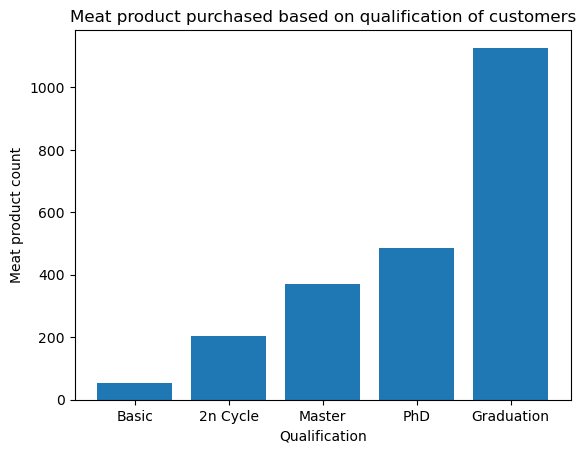

In [12]:
Education_count_df=marketing_data_df.groupby('Education')[['MntMeatProducts']].count()
Education_count_df_sorted=Education_count_df.sort_values(by='MntMeatProducts')
plt.bar(Education_count_df_sorted.index, Education_count_df_sorted.MntMeatProducts)
plt.xlabel('Qualification')
plt.ylabel('Meat product count')
plt.title('Meat product purchased based on qualification of customers')


<H4>1)The graph shows that MntMeatProducts are predominantly purchased by graduates, indicating that a marketing campaign aimed at this group could be effective. 
<br><br>2)Sales to graduate customers are more than double those of any other category.</H4>

<H3>We now have insights into which customers buy more meat products. There are two types of campaigns we can run: online and offline. 
   <br><br>Online campaigns can target customers with a higher number of web visits, while offline campaigns can focus on customers with more in-store visits.</H3>

In [9]:
marketing_data_df[['NumWebVisitsMonth','NumWebPurchases','NumStorePurchases']].describe().loc['mean']

NumWebVisitsMonth    5.316518
NumWebPurchases      4.084821
NumStorePurchases    5.790179
Name: mean, dtype: float64

<H3>The data above indicates that the number of store visits is higher than both website visits and online purchases. <br><br>We can analyze the data to boost website and store purchases. For increasing web purchases, we can run online campaigns targeting customers with frequent website visits or purchases.<H3>

In [25]:
marketing_data_df.groupby('Education')[['NumWebPurchases']].sum()

,NumWebPurchases
Education,
2n Cycle,757
Basic,102
Graduation,4649
Master,1492
PhD,2150


<H3>The data above confirms that web purchases are higher among graduate customers, followed by PhD holders. <br>Therefore, we can focus on running more online campaigns targeting graduate customers.</H3>

In [24]:
marketing_data_df.groupby('Education')[['NumStorePurchases']].sum()

,NumStorePurchases
Education,
2n Cycle,1118
Basic,154
Graduation,6570
Master,2182
PhD,2946


<H3>The data above confirms that store purchases are higher among graduate customers, followed by PhD holders. <br>Therefore, we can focus on conducting more offline campaigns targeting graduate customers.</H3>

<H2><u>From this section we can start analysing data based on marital status.</u></H2>

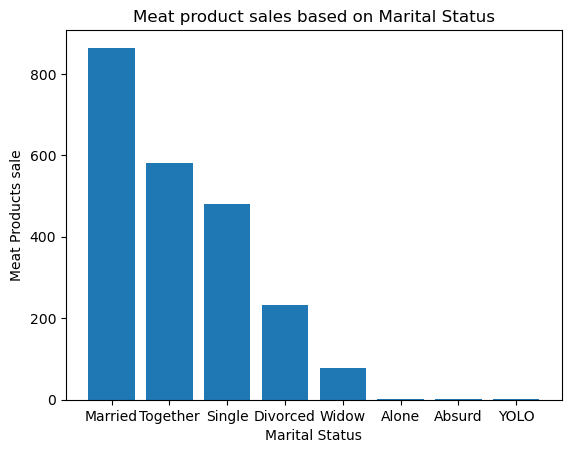

In [10]:
Marital_Status_grouped_df=marketing_data_df.groupby('Marital_Status')[['MntMeatProducts']].count()
Marital_Status_sorted_df=Marital_Status_grouped_df.sort_values(by='MntMeatProducts', ascending=False)
plt.bar(Marital_Status_sorted_df.index, Marital_Status_sorted_df.MntMeatProducts)
plt.xlabel("Marital Status")
plt.ylabel("Meat Products sale")
plt.title("Meat product sales based on Marital Status");

<H3>The above graph indicates that Meat Products are primarily purchased by Married customers, 
suggesting a marketing campaign targeted at this group.</H3>

In [32]:
Marital_Status_sorted_df['Contribution %']=(Marital_Status_sorted_df.MntMeatProducts/Marital_Status_sorted_df.MntMeatProducts.sum())*100
Marital_Status_sorted_df['Contribution %']=Marital_Status_sorted_df['Contribution %'].apply(lambda x: round(x,2))
Marital_Status_sorted_df

,MntMeatProducts,Contribution %
Marital_Status,,
Married,864,38.57
Together,580,25.89
Single,480,21.43
Divorced,232,10.36
Widow,77,3.44
Alone,3,0.13
Absurd,2,0.09
YOLO,2,0.09


Now we know which customers purchase more meat products.
But there are 2 types of campaign which we can do e.g, Online and offline campaigns.
Online campaigns can be done for the customers who have more web visits and offline campaigns can be done for the customers 
who have more store visits.

In [37]:
marital_status_web_df=marketing_data_df.groupby('Marital_Status')[['NumWebPurchases']].sum()
marital_status_df_sorted=marital_status_web_df.sort_values(by='NumWebPurchases', ascending=False)
marital_status_df_sorted['Contribution %']=(marital_status_df_sorted.NumWebPurchases/marital_status_df_sorted.NumWebPurchases.sum())*100
marital_status_df_sorted['Contribution %']=marital_status_df_sorted['Contribution %'].apply(lambda x:round(x,2))
marital_status_df_sorted

,NumWebPurchases,Contribution %
Marital_Status,,
Married,3532,38.60
Together,2367,25.87
Single,1859,20.32
Divorced,1000,10.93
Widow,356,3.89
Alone,15,0.16
YOLO,14,0.15
Absurd,7,0.08


<H3>1) The data below indicates that web purchases are higher among married customers, followed by those classified as "together." <br>Therefore, we should focus on running more online campaigns for married customers.<br><br> 2) Additionally, we can also target customers listed as "together," as married customers contribute 38.60% and together customers contribute 25.87%. Given the significant contributions from both groups, we can implement more online campaigns for married, together, and single customers.</H3>

In [33]:
marketing_new_data=marketing_data_df['NumWebPurchases'].sort_values(ascending=False).head(10)
marketing_df_new_data=pd.DataFrame(marketing_new_data)
marketing_df_new_data.index.name='Customer_ID'
marketing_df_new_data

,NumWebPurchases
Customer_ID,
210,27
449,27
14,25
2063,23
661,11
170,11
2049,11
2057,11
2076,11


<H3>
1) The data above highlights the top 10 customers for online purchases. <br><br> 2)To boost profits, we could offer a discount or coupon to the top 5 or top 10 customers on their next purchase.
</H3>

<H2><span style='color:purple;'>We can further analyze which products are purchased by these top 10 customers
<br>and then offer discounts or coupons specifically for those items.<br><br> Further analysis will be conducted...</span></H2>